# Tutorial about localization precision

Localization precision is determined from consecutive localizations that are identified within a certain search radius. The results include the distances between localization pairs, the position deltas for each coordinate and the corresponding frame of the first localizations.

In [1]:
from pathlib import Path

%matplotlib inline

import matplotlib.pyplot as plt

import locan as lc

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
lc.show_versions(system=False, dependencies=False, verbose=False)


Locan:
   version: 0.10.0

Python:
   version: 3.8.12


## Load rapidSTORM data file

Identify some data in the test_data directory and provide a path using `pathlib.Path` (returned by `lc.ROOT_DIR`)

In [3]:
path = lc.ROOT_DIR / 'tests/test_data/rapidSTORM_dstorm_data.txt'
print(path, '\n')

dat = lc.load_rapidSTORM_file(path=path, nrows=1000)

c:\users\sod28mb\mydata\programming\python\projects\locan\locan\tests\test_data\rapidSTORM_dstorm_data.txt 



Print information about the data: 

In [4]:
print(dat.data.head(), '\n')
print('Summary:')
dat.print_summary()
print('Properties:')
print(dat.properties)

     position_x    position_y  frame     intensity  chi_square  \
0   9657.400391  24533.500000      0  33290.101562   1192250.0   
1  16754.900391  18770.000000      0  21275.400391   2106810.0   
2  14457.599609  18582.599609      0  20748.699219    526031.0   
3   6820.580078  16662.800781      0   8531.769531   3179190.0   
4  19183.199219  22907.199219      0  14139.599609    448631.0   

   local_background  
0        767.732971  
1        875.460999  
2        703.369995  
3        852.789001  
4        662.770020   

Summary:
identifier: "1"
comment: ""
creation_date: "2021-11-30 13:26:53 +0100"
modification_date: ""
source: EXPERIMENT
state: RAW
element_count: 999
frame_count: 48
file_type: RAPIDSTORM
file_path: "c:\\users\\sod28mb\\mydata\\programming\\python\\projects\\locan\\locan\\tests\\test_data\\rapidSTORM_dstorm_data.txt"

Properties:
{'localization_count': 999, 'position_x': 16066.234, 'position_y': 17550.37, 'region_measure_bb': 1064111500.0, 'localization_density_bb

## Visualization

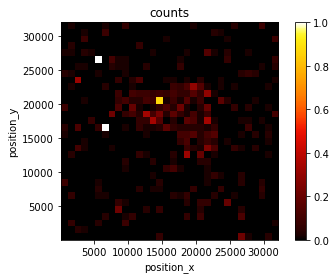

In [5]:
lc.render_2d(dat, bin_size=1000, rescale=(0,100));

## Analyze localization precision

In [6]:
lp = lc.LocalizationPrecision(radius=50)

In [7]:
lp.compute(dat)
lp.results.head()

Processed frames:: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 46/46 [00:00<00:00, 56.88it/s]


,position_delta_x,position_delta_y,position_distance,frame
0,4.599609,-2.800781,5.385237,0
1,-1.000000,-3.400391,3.544384,0
2,17.000000,-17.500000,24.397746,0
3,5.101562,-8.100586,9.573162,0
4,-14.099609,22.599609,26.637217,0


The plot

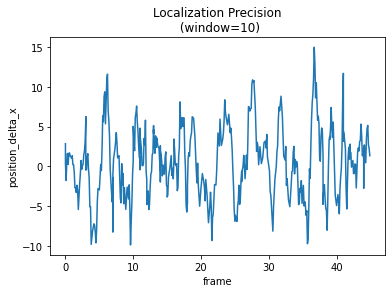

In [8]:
lp.plot(loc_property='position_delta_x', window=10);

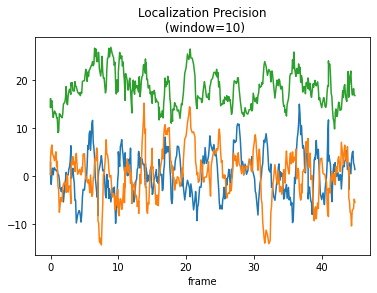

In [9]:
lp.plot(window=10);

The histogram for the distances per default includes a fit to a distribution expected for normal distributed localizations. Sigma / sqrt(2) is the localization precision.

C:\Miniconda3\envs\soeren_py38_211029\lib\site-packages\scipy\stats\_distn_infrastructure.py:1833: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


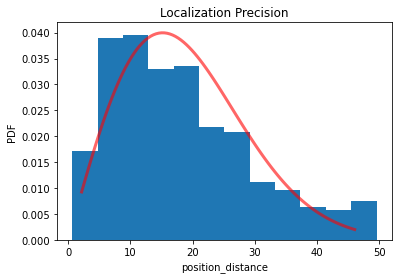

In [10]:
lp.hist();

Alternatively the position deltas can be histogrammed.

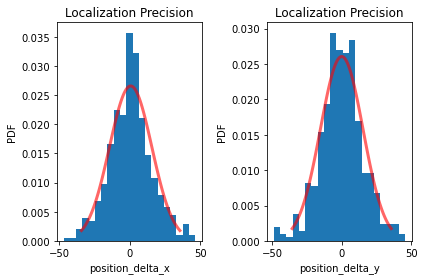

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2)
lp.hist(ax=ax[0], loc_property='position_delta_x')
lp.hist(ax=ax[1], loc_property='position_delta_y')
plt.tight_layout()
plt.show()

## Fit distributions and show parameters

Appropriate distribution functions are fitted to the data either by calling the hist function or by running:

In [12]:
lp.fit_distributions()

C:\Miniconda3\envs\soeren_py38_211029\lib\site-packages\scipy\stats\_distn_infrastructure.py:1833: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


The estimated fit parameters are provided under the `distribution_statistics` attribute

In [13]:
lp.distribution_statistics.parameter_dict()

{'position_delta_x_loc': 0.5793574,
 'position_delta_x_scale': 15.016627,
 'position_delta_y_loc': -0.028082674,
 'position_delta_y_scale': 15.310259,
 'position_distance_sigma': 15.169726562500031,
 'position_distance_loc': 0,
 'position_distance_scale': 1}

Remember: localization precision is typically defined as the standard deviation for the distances between localizations and their center position (the true dye position). Therefore, the estimated sigmas have to be divided by sqrt(2) to yield localization precision.